# AutoCorrelation

Calculate autocorrelation measures on time series.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from neurodsp.sim import sim_powerlaw, sim_combined, sim_synaptic_current

In [2]:
import seaborn as sns
sns.set_context('talk')

In [3]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.run import run_sims

In [4]:
from code.autocorr import autocorr

## Settings

In [5]:
# Simulation settings
n_seconds = 10
fs = 1000

# Collect together simulation parameters
sim_params_pow = {'n_seconds' : n_seconds, 'fs' : fs}
sim_params_comb = {'n_seconds' : n_seconds, 'fs' : fs, 
                   'components' : {'sim_powerlaw' : {}, 'sim_oscillation' : {'freq' : 10}}, 
                   'component_variances' : [1, 0.25]}

# Settings for autocorrelations
ac_measure_params = {'max_lag' : 250, 'lag_step' : 1}

# Set the number of instances to run
n_instances = 25

# Set the range of exponents to explore
exps = np.arange(-3, 0.5, 0.5)

# Set the colormap for the plots
#cmap = plt.cm.winter
cmap = plt.cm.BuGn_r
#cmap = plt.cm.viridis

In [6]:
# # Converting a seaborn pallete to a mpl colormap

# import seaborn as sns
# from matplotlib.colors import ListedColormap, Colormap

# cp = sns.cubehelix_palette(len(exps), start=.5, rot=-.75)
# #cp = sns.color_palette("PuBuGn_d")
# cmap = ListedColormap(cp)

In [7]:
# Set up the colors to plot the auto-correlations
colors = cmap(np.linspace(0, 1, len(exps)))
norm = Normalize(vmin=min(exps), vmax=max(exps))

In [8]:
# Set whether to save out figures
SAVE_FIG = True

### Helper Functions

In [9]:
def autocorr_wrapper(sig, **kwargs):
    return autocorr(sig, **kwargs)[1]

### Calculating AutoCorrelation on Example Signals

#### Powerlaw Signals

In [10]:
# Set a test exponent value
exp = -2

In [11]:
# Simulate a powerlaw signal
sig = sim_powerlaw(n_seconds, fs, exponent=exp)

In [12]:
# Calculate autocorrelation
times, sig_acs = autocorr(sig, **ac_measure_params)

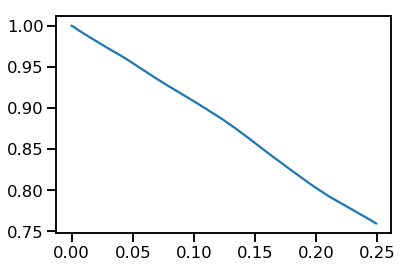

In [13]:
# Plot the autocorrelation across time delays
plt.plot(times/fs, sig_acs)

#### Powerlaw Signals with a Knee

In [14]:
# Set a test exponent value
exp_kn = -2

In [15]:
# Simulate a signal with a knee
sig_kn = sim_synaptic_current(n_seconds, fs)

In [16]:
# Calculate autocorrelation
times, sig_acs = autocorr(sig_kn, **ac_measure_params)

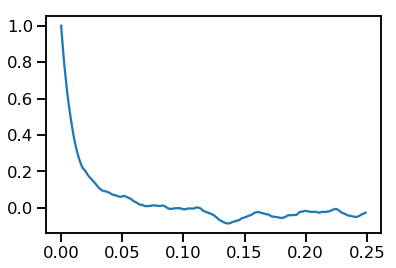

In [17]:
# Plot the autocorrelation across time delays
plt.plot(times/fs, sig_acs)

## Powerlaw Signals

In [18]:
# Run a set of simulations, calculating autocorrelation across exponents
acs_pow = run_sims(sim_powerlaw, sim_params_pow, autocorr_wrapper, ac_measure_params,
                   update='update_exp', values=exps, n_instances=n_instances)
acs_pow = np.array(acs_pow)

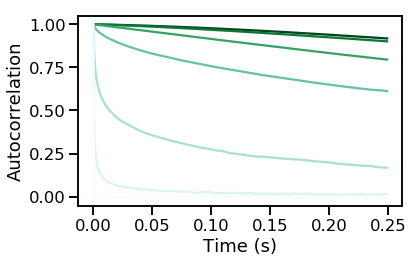

In [19]:
# Plot autocorrelation across exponent values
for ac, exp, color in zip(acs_pow, exps, colors):
    plt.plot(times/fs, ac, label=exp, color=color)
    
plt.xlabel('Time (s)')
plt.ylabel('Autocorrelation')

plt.tight_layout()

if SAVE_FIG: plt.savefig('plts/acs-ap.pdf')

## Powerlaw Signals with Oscillations

In [20]:
# Run a set of simulations, calculating autocorrelation across exponents, with an oscillation
acs_osc = run_sims(sim_combined, sim_params_comb, autocorr_wrapper, ac_measure_params,
                   update='update_comb_exp', values=exps, n_instances=n_instances)
acs_osc = np.array(acs_osc)

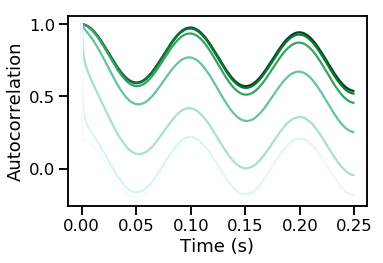

In [21]:
# Plot autocorrelation across exponent values
for ac, exp, color in zip(acs_osc, exps, colors):
    plt.plot(times/fs, ac, label=exp, color=color)
    
plt.xlabel('Time (s)')
plt.ylabel('Autocorrelation')

plt.tight_layout()

if SAVE_FIG: plt.savefig('plts/acs-osc.pdf')

### Create a colorbar for the plots

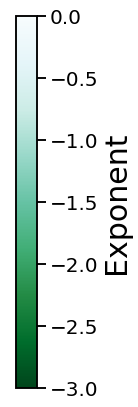

In [22]:
# Make a colorbar for the plots
fig, ax = plt.subplots(figsize=(2, 6))
cbar = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, orientation='vertical')

cbar.set_label('Exponent', fontsize=30)
cbar.ax.tick_params(labelsize=20)

fig.subplots_adjust(bottom=0.5)
fig.subplots_adjust(right=0.45)

plt.tight_layout()

if SAVE_FIG: plt.savefig('plts/acs-colorbar.pdf')